# **Welcome to Time Series Handson**

In [43]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
# Import the required dataset
df = pd.read_csv(r'D:\Intellipaat\Datasets\Air_passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [45]:
# Shape of the data
print(f'Rows : {df.shape[0]}, Columns : {df.shape[1]}')

Rows : 144, Columns : 2


In [46]:
# Overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [47]:
# Convert the object to datetime
df['Month'] = pd.to_datetime(df['Month'])

In [48]:
# Set the Month column as index
df.set_index('Month', drop=True, inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

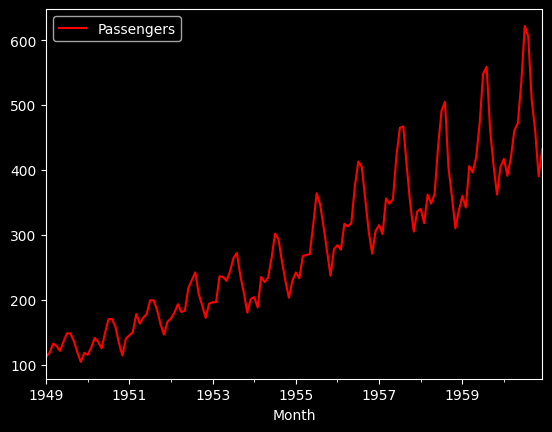

In [49]:
# Visualize the data
df.plot(color = 'red')

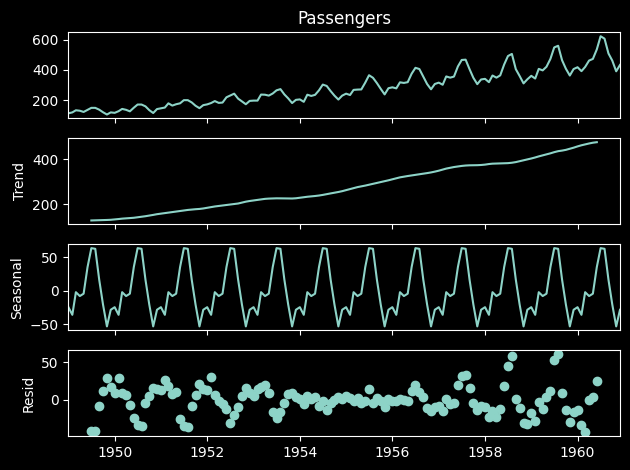

In [50]:
# Use seasonal decompose to plot the components of time series data
decompose = seasonal_decompose(df['Passengers'])
decompose.plot();

The seasonal decomposition is a method used in time series analysis to represent a time series as a sum (or, sometimes, a product) of three components – the linear trend, the periodic (seasonal) component, and random residuals.

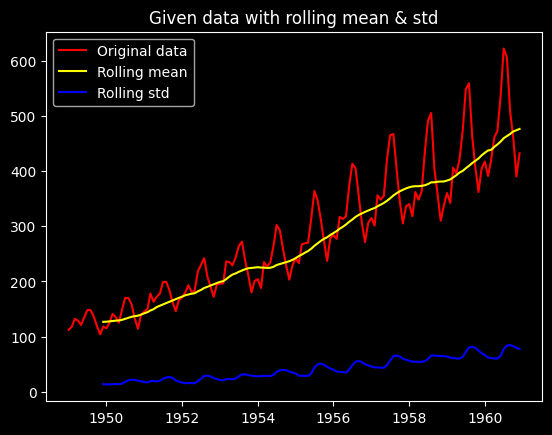

In [51]:
# Visualize the data with rolling mean and standard deviation

# Rolling mean of the data
rolling_mean = df.rolling(window=12).mean()
# Rolling std of the data
rolling_std = df.rolling(window=12).std()

# Visualize 
plt.plot(df, color = 'red', label = 'Original data')
plt.plot(rolling_mean, color = 'yellow', label = 'Rolling mean')
plt.plot(rolling_std, color = 'blue', label = 'Rolling std')
plt.legend()
plt.title('Given data with rolling mean & std')
plt.show()

## Transformation of Time Series Data

In [52]:
df_diff = df.diff().dropna()                                  # Differencing of the data

In [53]:
result = adfuller(df_diff['Passengers'])
result[1]

0.0542132902838255

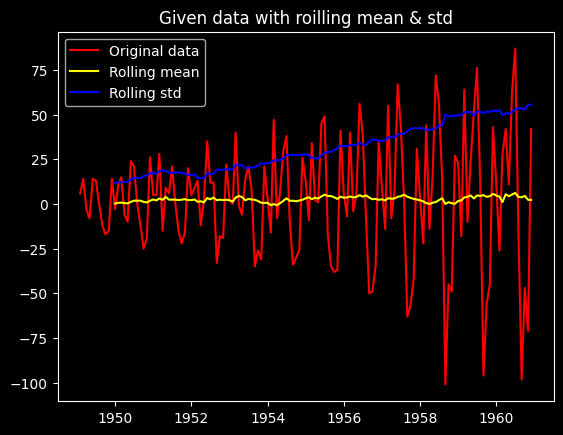

In [54]:
# Visualize the transformed data

# Rolling mean of the data
rolling_mean = df_diff.rolling(window=12).mean()
# Rolling std of the data
rolling_std = df_diff.rolling(window=12).std()

# Visualize 
plt.plot(df_diff, color = 'red', label = 'Original data')
plt.plot(rolling_mean, color = 'yellow', label = 'Rolling mean')
plt.plot(rolling_std, color = 'blue', label = 'Rolling std')
plt.legend()
plt.title('Given data with roilling mean & std')
plt.show()

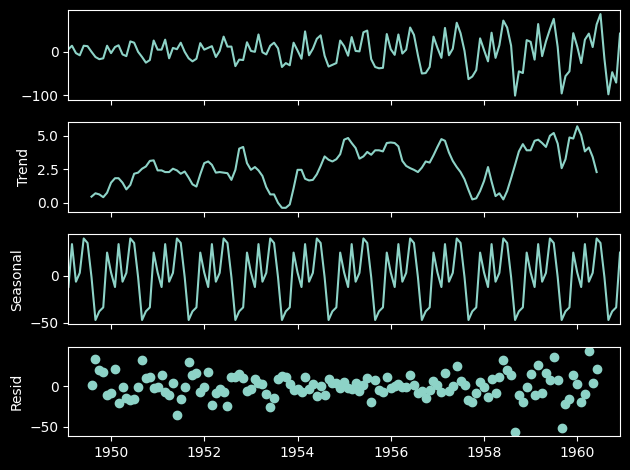

In [55]:
# Check the decompostion of the data
decompose = seasonal_decompose(df_diff)
decompose.plot();

#

We can see clear difference between this & previous decompose plot, by looking at y-axis of both plot.

In [56]:
# Check whether the data became stationary or not using adfuller
result = adfuller(df_diff)
result[1]


0.0542132902838255

By doing differencing twice we're getting very small value, so we decided to continue with this value which is nearby 0.05, and will work for us

<Axes: xlabel='Month'>

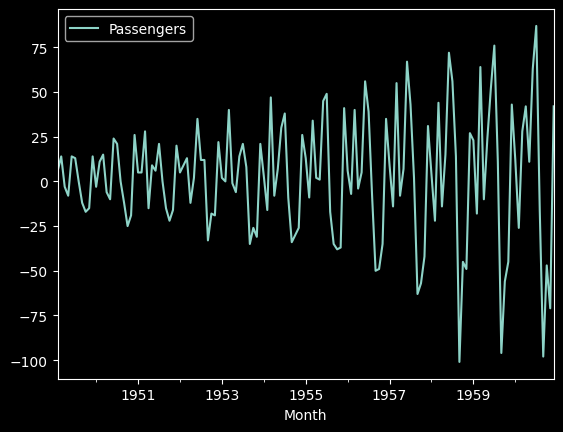

In [57]:
# Plot the transformed data
df_diff.plot()

In [58]:
# Check the length of data
len(df_diff)

143

In [59]:
# Split the data into training & testing
train = df_diff.iloc[0:114]
test = df_diff.iloc[114 : ]

# Auto-Regressive models

In [60]:
# The auto_arima model searches the best order for the model that has the lowest AIC value.
order = auto_arima(df_diff, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1413.909, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1396.122, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1394.683, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1397.258, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1401.853, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1378.338, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1396.5

Now create a model using best order we got from auto_arima

In [61]:
order.summary

<bound method ARIMA.summary of ARIMA(order=(4, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

### ARIMA Model

In [62]:
arima_model = ARIMA(train, order = (4, 0, 3))
arima_model = arima_model.fit()

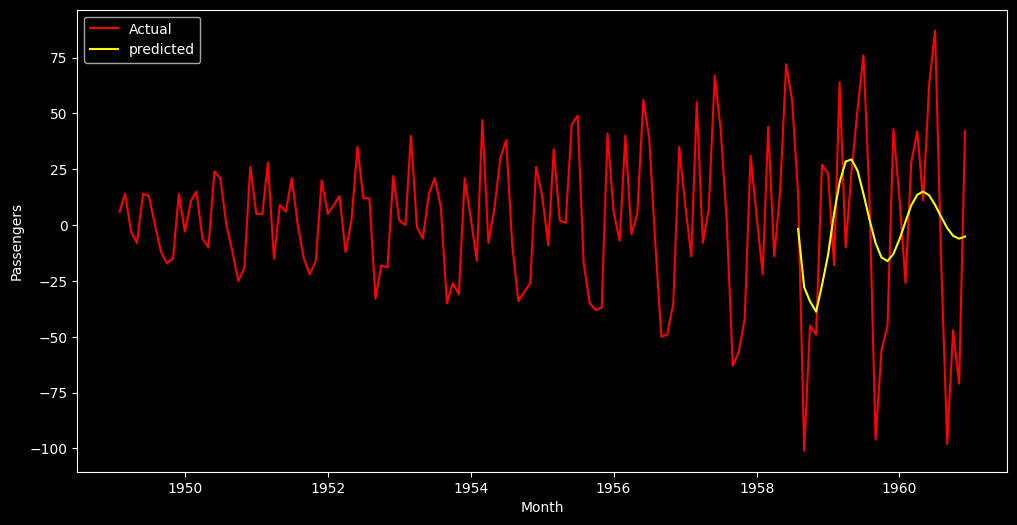

In [63]:
# Predict the data using arima model
arima_pred = arima_model.predict(start = len(train), end=len(train)+len(test)-1, dynamic=True)

# Visualize the predicted data with actual data
plt.figure(figsize=(12, 6))
plt.plot(df_diff, color = 'red', label = 'Actual')
plt.plot(arima_pred, color = 'yellow', label = 'predicted')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

As you can see, the predictions are way off the actual values from the test set. Therefore, we can move to the seasonal ARIMA model for our forecasting

### SARIMA Model

In [65]:
sarima_model = SARIMAX(train,order=(4, 0, 3),seasonal_order=(4, 0, 3, 12))
sarima_model = sarima_model.fit()

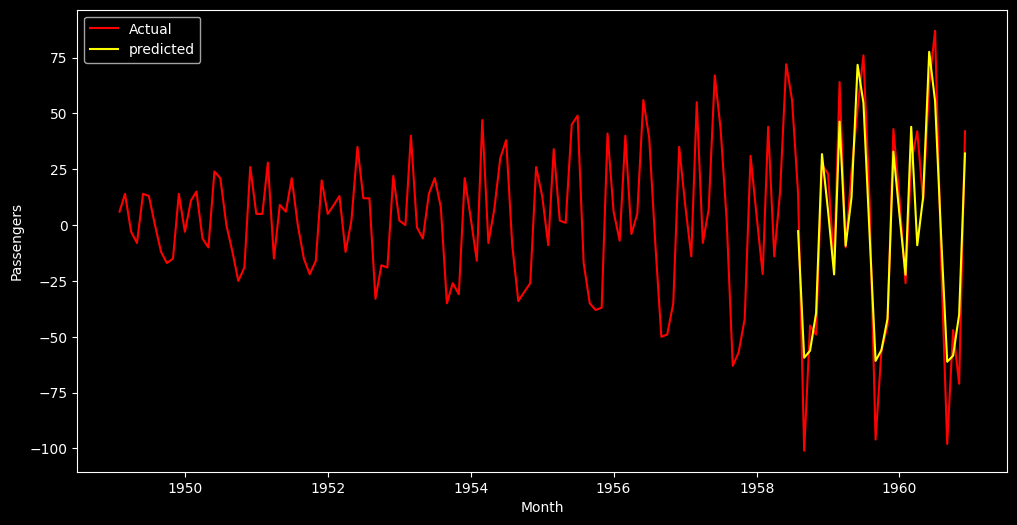

In [68]:
# Predict the data using model
sarima_pred = sarima_model.predict(start = len(train), end=len(train)+len(test)-1, dynamic=True)

# Visualize the predicted data with actual data
plt.figure(figsize=(12, 6))
plt.plot(df_diff, color = 'red', label = 'Actual')
plt.plot(sarima_pred, color = 'yellow', label = 'predicted')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

Here, we can see the predicted values on the test set are more accurate than the ARIMA model. Therefore we have successfully created a Time series
forecast model. Now we will use this model to forecast the time series.

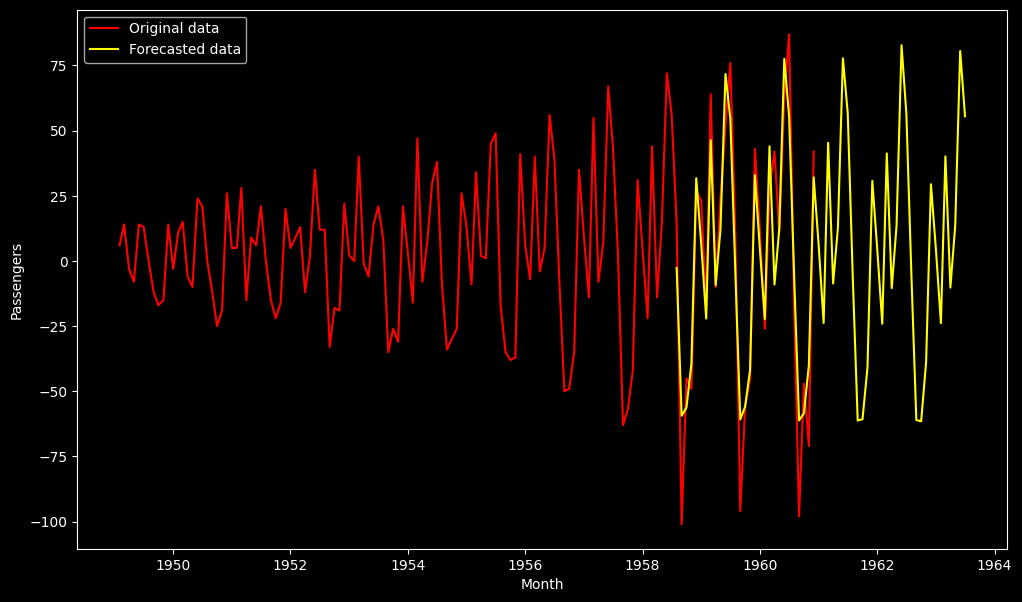

In [67]:
# Forecast the value of next 60 months
forecast = sarima_model.forecast(steps=60)

# Visualize the data with forecasted values
plt.figure(figsize=(12, 7))
plt.plot(df_diff, color = 'red', label = 'Original data')
plt.plot(forecast, color = 'yellow', label = 'Forecasted data')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

We had trained the model on the new_data  values, therefore the predictions are aligned to the same. 

We can train the model with the original dataset, and add the order of differencing manually and get the predictions on the actual values.

END

---